In [17]:
import os
import h5py
import librosa
import librosa.display as display
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = h5py.File('/scratch/richardso21/DCASE_3_Models/grill/workingfiles/spect/ff1010bird/100180.wav.h5','r')

In [3]:
list(f.keys())

['features', 'times']

In [4]:
features = f['features'].value

In [5]:
times = f['times'].value

In [6]:
features.shape

(700, 80)

In [7]:
display.specshow(features)

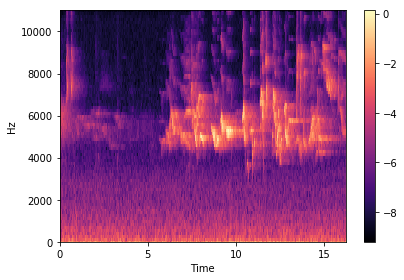

In [22]:
display.specshow(features.T,y_axis='linear',x_axis='time')
plt.colorbar()
plt.tight_layout()
plt.savefig('/home/richardso21/images/sample_nopcen.png')

---

In [9]:
a, sr = librosa.load('/home/data/birdAudioDetectionChallenge/ff1010bird/wav/100180.wav')

(80, 701)


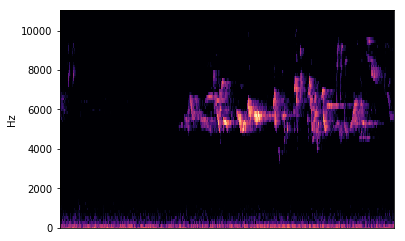

In [14]:
a_log = librosa.feature.melspectrogram(a,sr=sr,n_fft=1024,hop_length=315,n_mels=80,fmax=11000,power=2)
a_amp = librosa.amplitude_to_db(a_log,ref=np.max)
display.specshow(a_amp,sr=sr,y_axis='linear')
print(a_amp.shape)

(80, 701)


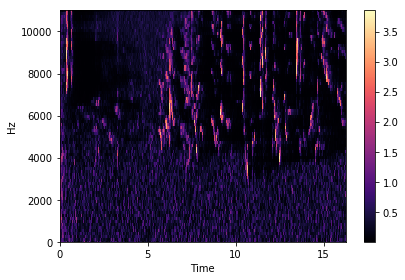

In [24]:
a_pcen = librosa.pcen(a_log*(2**31))
display.specshow(a_pcen,sr=sr, y_axis='linear',x_axis='time')
print(a_pcen.shape)
plt.colorbar()
plt.tight_layout()
plt.savefig('/home/richardso21/images/sample_pcen.png')

(80, 701)


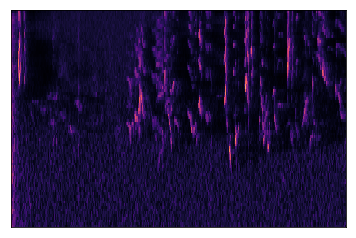

In [13]:
a_pcen = librosa.pcen(a_log*(2**31))
display.specshow(a_pcen,sr=sr)
print(a_pcen.shape)

---

In [38]:
import IPython.display as ipdb

In [39]:
ipdb.Audio('/scratch/richardso21/mp3splt_files/processed_nigliq/NIGLIQ1_20160603_170946_0000m_00s__0000m_10s.wav')

---

In [127]:
times_librosa_test = np.linspace(0,librosa.get_duration(a),num=a_pcen.shape[1],dtype='float32')

array([ 0.        ,  0.01428571,  0.02857143,  0.04285714,  0.05714286,
        0.07142857,  0.08571429,  0.1       ,  0.11428571,  0.12857144,
        0.14285715,  0.15714286,  0.17142858,  0.18571429,  0.2       ,
        0.21428572,  0.22857143,  0.24285714,  0.25714287,  0.27142859,
        0.2857143 ,  0.3       ,  0.31428573,  0.32857144,  0.34285715,
        0.35714287,  0.37142858,  0.3857143 ,  0.4       ,  0.41428572,
        0.42857143,  0.44285715,  0.45714286,  0.47142857,  0.4857143 ,
        0.5       ,  0.51428574,  0.5285714 ,  0.54285717,  0.55714285,
        0.5714286 ,  0.5857143 ,  0.6       ,  0.6142857 ,  0.62857145,
        0.64285713,  0.6571429 ,  0.67142856,  0.6857143 ,  0.7       ,
        0.71428573,  0.7285714 ,  0.74285716,  0.75714284,  0.7714286 ,
        0.78571427,  0.8       ,  0.8142857 ,  0.82857144,  0.8428571 ,
        0.85714287,  0.87142855,  0.8857143 ,  0.9       ,  0.9142857 ,
        0.9285714 ,  0.94285715,  0.95714283,  0.9714286 ,  0.98

In [171]:
with h5py.File('file_test.h5', 'w') as data_file:
    data_file.create_dataset('features',data=a_pcen.T,dtype='float32')
    data_file.create_dataset('times',data=times_librosa_test,dtype='float32')

In [172]:
with h5py.File('file_test.h5','r') as attempt:
    attempt1 = attempt['features'].value

In [173]:
attempt1 == a_pcen.T

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])